In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

Vamos a crear un proceso de colision con una esfera dura

In [66]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0): #masa, radio y el ID son dados
        
        self.dt = t[1] - t[0] # derivada temporal
        
        # Atributos instantaneos (se sobre escriben en cada iteracion)
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.p = self.m*self.v # Momento
        
        self.f = self.m*self.a # fuerza
        
        self.c = (1/2)*self.m*np.dot(self.v,self.v) #E cinetica
        
        # Historial
        self.R = np.zeros((len(t), len(r0))) # posiciones temporal y espaciales
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
        
        self.C = np.zeros_like(self.R)
        
        # Fisica
        self.K = 10. # dureza del material, mayor es mas duro menor mas suave
        
    def Evolution(self, i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        # Actualizar aceleración para programar los choques
        self.a = self.f/self.m
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
    
    # para que las particulas se choquen
    def CalculateForce(self, p):
        d = np.linalg.norm(self.r - p.r)
        compresion = self.radius + p.radius - d
        
        # si la distancia es menor a la suma de los dos radios se comprime
        if compresion >= 0: 
            Fn = self.K*(compresion**3)
            
            self.n = (self.r - p.r)/d
            self.f = Fn*self.n
            
             
    # Setter
    def SetPosition(self, i):
        self.R[i] = self.r
        
    def SetVelocity(self,i): # tambien se calcula momento
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.C[i] = (1/2)*self.m*(self.v**2)
        
    # Getter
    def GetPosition(self, scale = 1):
        return self.R[::scale] # AAAAAAAAÅ
    
    def GetVelocity(self, scale=1):
        return self.V[::scale]
    
    def GetMomentum(self, scale=1):
        return self.P[::scale]
    
    def GetKinEnergy(self, scale=1):
        return self.C[::scale]

In [67]:
def GetParticles(N, t):
    
    r0 = np.array([-5, 0.5])
    v0 = np.array([10., 0.])
    a0 = np.array([0. , 0.])
    
    r1 = np.array([0.,0.])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    
    p0 = Particle(r0, v0, a0, t, m=1, radius=2., Id=0)
    p1 = Particle(r1, v1, a1, t, m=1, radius=2., Id=1)
    
    Particles = [p0, p1]
    
    return Particles

In [80]:
dt = 0.01
tmax = 1
t = np.arange(0, tmax, dt) # tiempos
Particles = GetParticles(1,t)

In [81]:
def RunSimulation(t, Particles):
    for it in range(len(t)):
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            
    return Particles

In [82]:
Particles = RunSimulation(t, Particles)

#Particles[0].GetPosition()

<IPython.core.display.Javascript object>


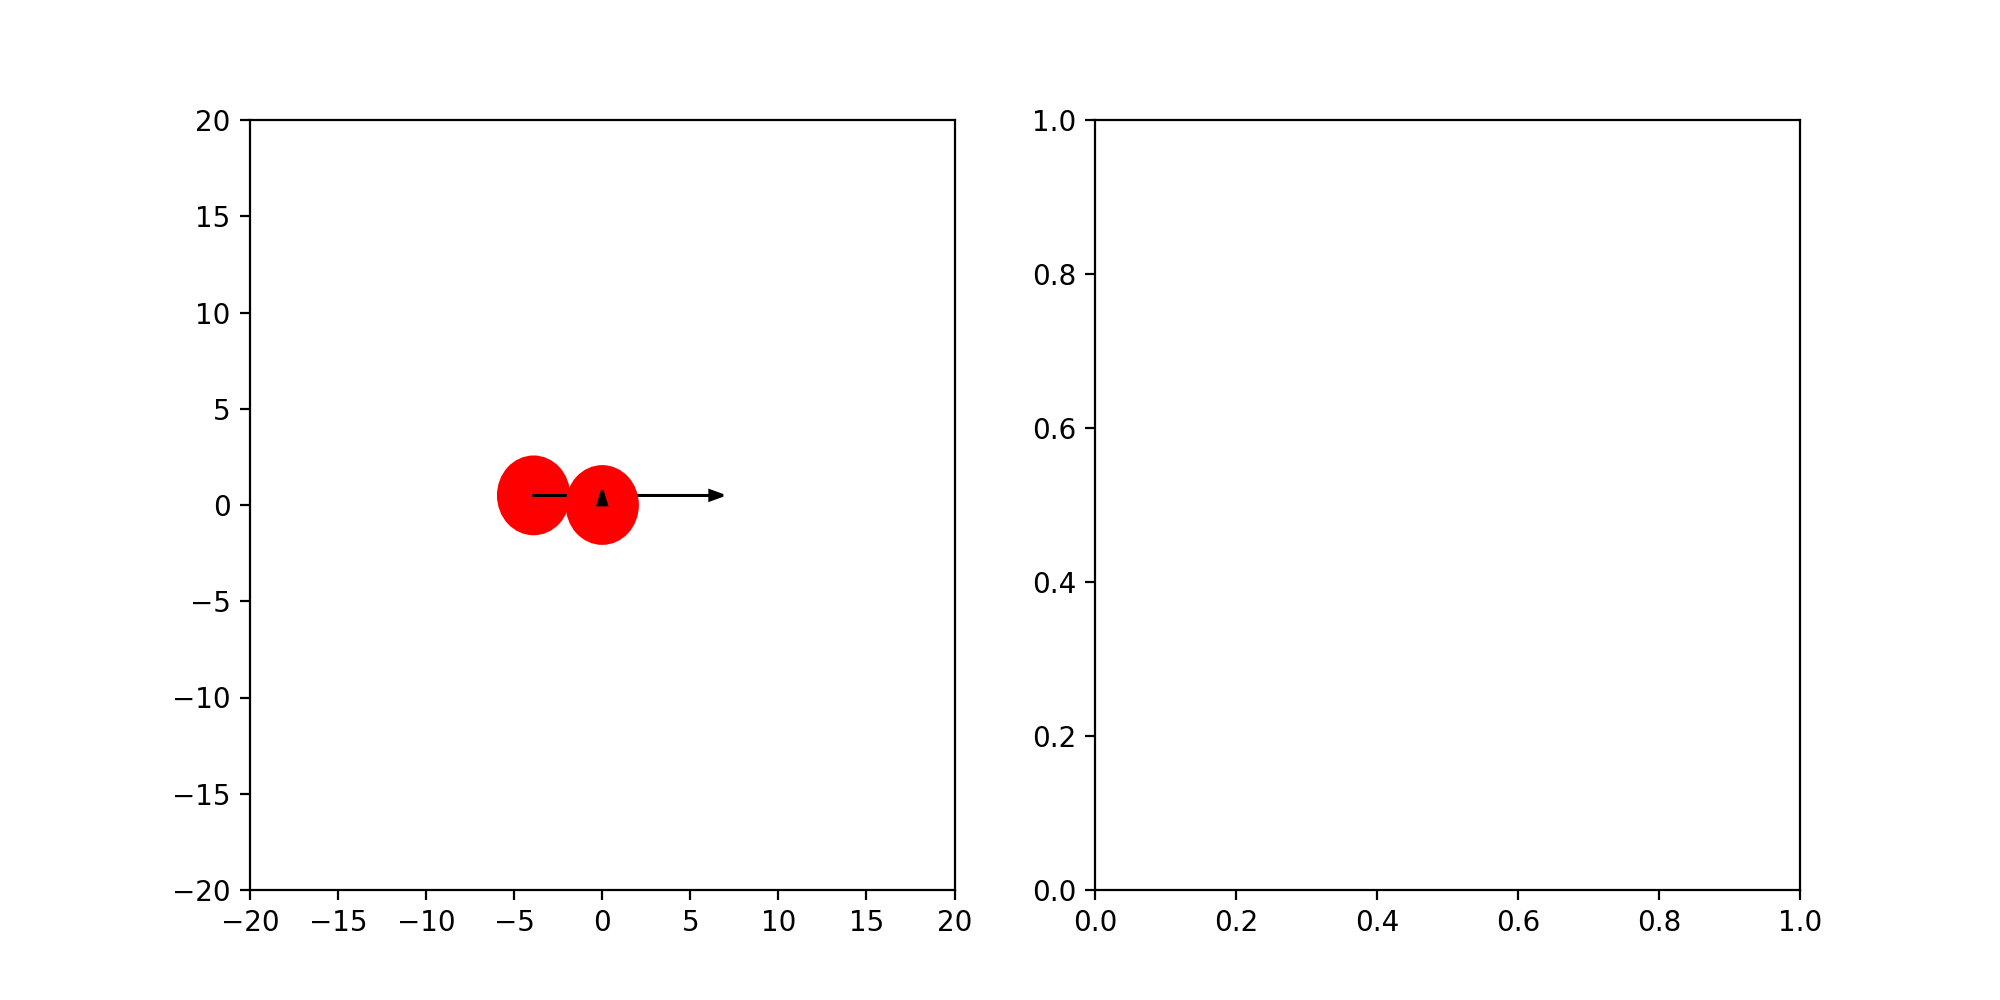

In [85]:
# VAMOS A ANIMAR

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)

# Matriz de actualizacion
def Update(i):
    init()
    for p in Particles:
        
        x = p.GetPosition()[i,0]
        y = p.GetPosition()[i,1]
        
        vx = p.GetVelocity()[i,0]
        vy = p.GetVelocity()[i,1]
        
        circle = plt.Circle((x,y), p.radius, color='r', fill=True )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5)
        
Animation = anim.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [84]:
plt.plot(Particles[0].GetMomentum()[:,0])
plt.plot(Particles[1].GetMomentum()[:,0])

<IPython.core.display.Javascript object>


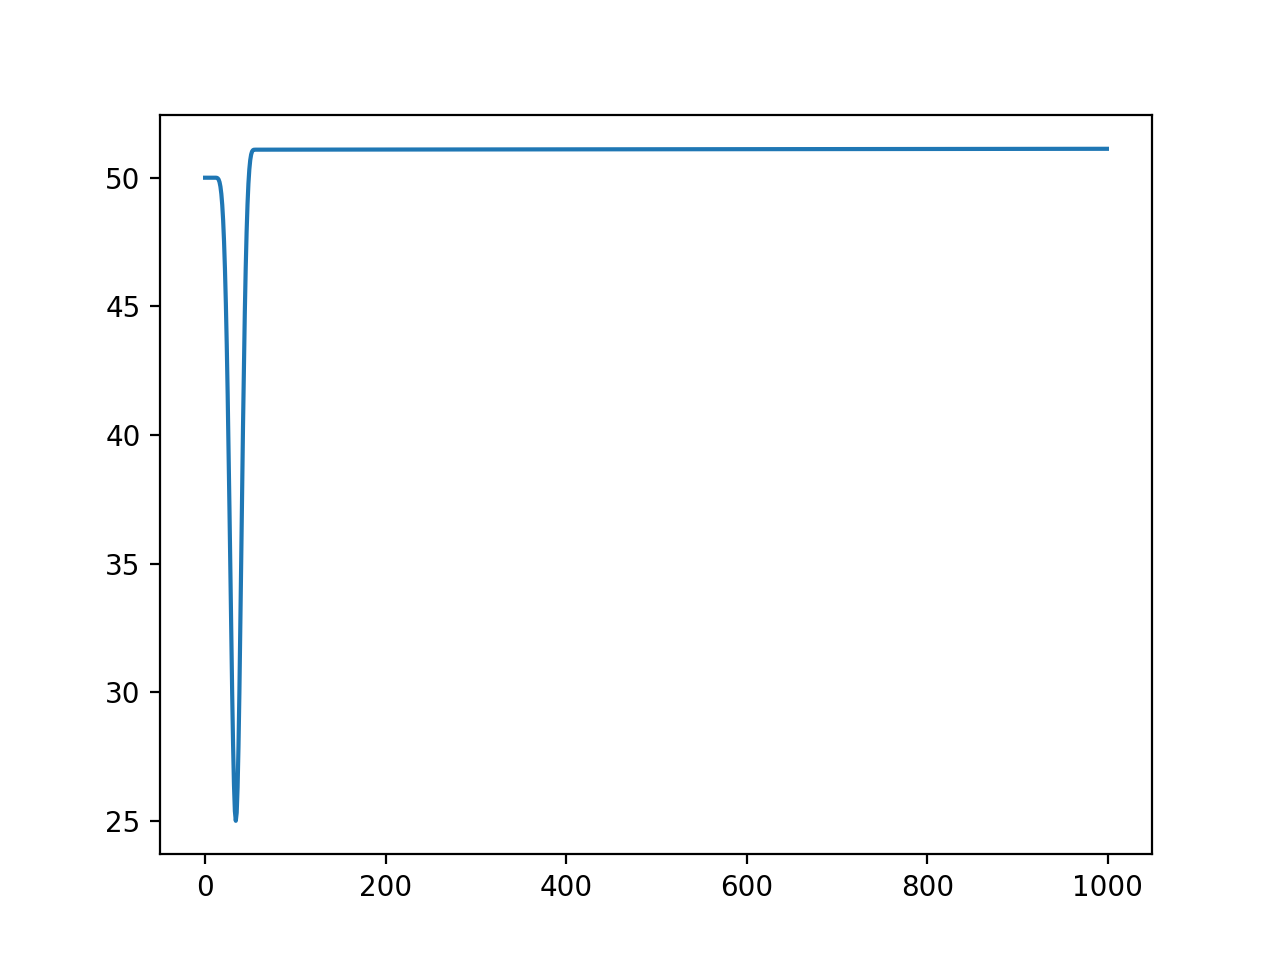

In [77]:
plt.plot(Particles[0].GetKinEnergy()[:,0]+Particles[1].GetKinEnergy()[:,0])

In [ ]:
plt.plot